# Head Trained Denoiser Tested on Pediatric Abdomen: Demonstrating Protocol More Significant than Anatomy

The goal of this study is to train a denoising model on a Low Dose Head CT training dataset and test on a low dose abdomen CT dataset.

This will address the feedback from Reviewer 1 and the AE of whether the difference in pediatric performance is due to anatomic differences or acquisition differences. 

The hypothesis of this experiment is that the head trained denoising model will perform as well as the small-FOV abdomen model (the pediatric protocol).

This supports our method of FOV/texture based augmentation over training more burdensome dedicated pediatric models. If it doesn’t test as well on the abdomen test set that will suggest it’s a mix of both acquisition and anatomic differences.

## Low Dose Head CT Dataset

Generated from `bash make_heads_dataset.sh`

Using [PedSilicoICH](https://github.com/DIDSR/PedSilicoICH)

In [1]:
from LDHeadCTDataset import LDHeadCTDataset

In [8]:
base_dir = '/projects01/didsr-aiml/brandon.nelson/pedsilicoICH/head_experiment'
dset = LDHeadCTDataset(base_dir)
dset

Dataset LDHeadCTDataset
    Number of datapoints: 15680
    Root location: /projects01/didsr-aiml/brandon.nelson/pedsilicoICH/head_experiment

In [9]:
dset.metadata

,name,age,intensity,center x,center y,center z,lesion type,mass effect,lesion volume [mL],mA,kVp,views,fov [mm],kernel,image file,mask file,seed,edema,slice
161,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,0.0
162,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,1.0
163,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,2.0
164,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,3.0
165,case_001,11.5,NaN,NaN,NaN,NaN,NaN,NaN,0,60.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,433015,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31677,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,212.0
31678,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,213.0
31679,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,214.0
31680,case_099,38.0,NaN,NaN,NaN,NaN,NaN,NaN,0,240.0,120.0,1000,250,standard,/projects01/didsr-aiml/brandon.nelson/pedsilic...,NaN,366263,0,215.0


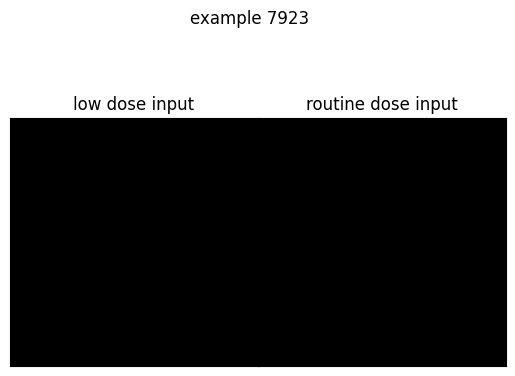

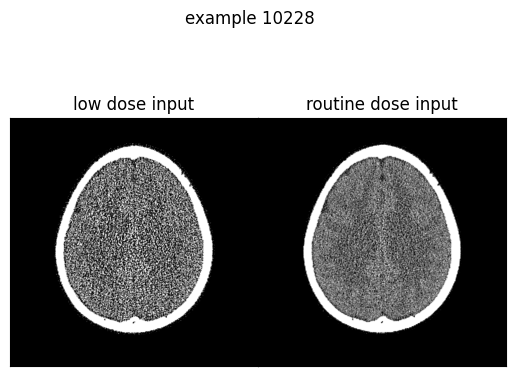

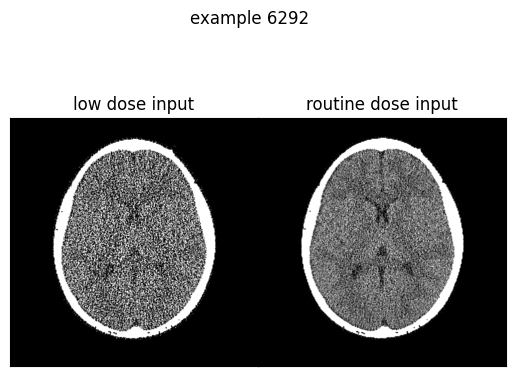

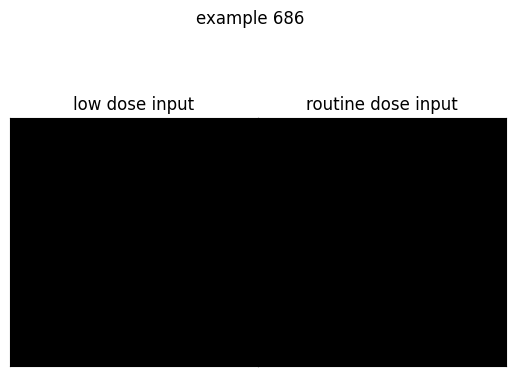

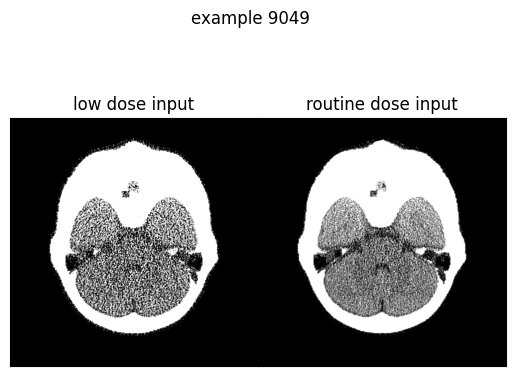

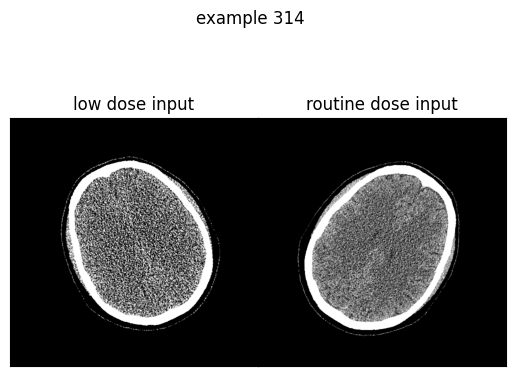

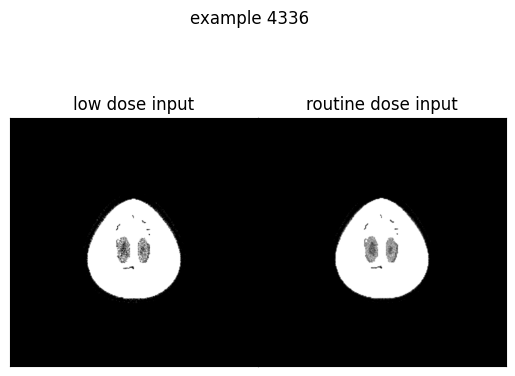

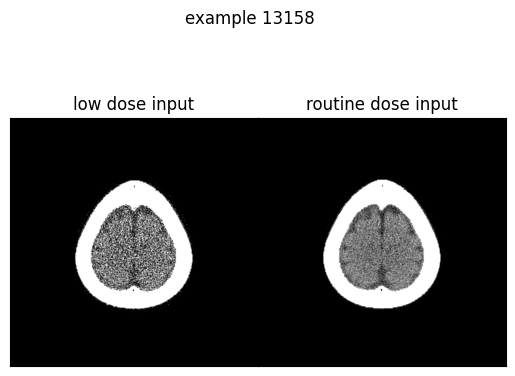

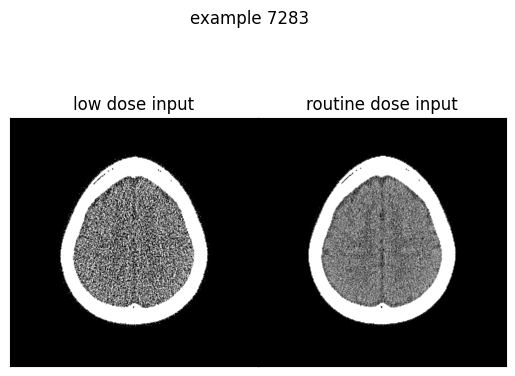

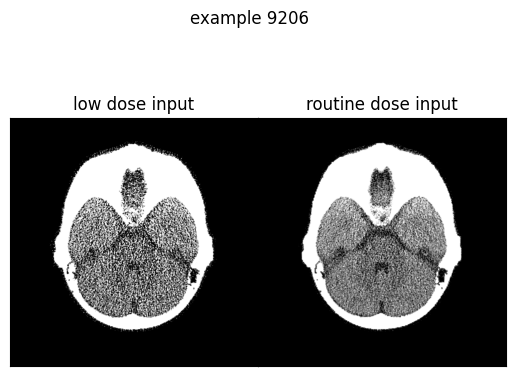

In [10]:
from utils import ctshow
import numpy as np
import matplotlib.pyplot as plt

n_examples = 10
random = np.random.default_rng(43)

for row in range(n_examples):
    idx = random.integers(0, len(dset))
    x, y = dset[idx]
    window = 'brain'
    f, axs = plt.subplots(1, 2, gridspec_kw=dict(hspace=0,wspace=0))
    f.suptitle(f'example {idx}')
    ctshow(x, fig=f, ax=axs[0], window=window)
    axs[0].set_title('low dose input')
    ctshow(y, fig=f, ax=axs[1], window=window)
    axs[1].set_title('routine dose input')
    f.show()

In [13]:
dset.metadata.iloc[314]['image file']

'/projects01/didsr-aiml/brandon.nelson/pedsilicoICH/head_experiment/ld/case_002/dicoms/case_002_153.dcm'

Looks like in cases where there's augmentation the augmentation is not consistent between seeds